In [153]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
sns.set_style("whitegrid")
PROGS = {"psrv": "Parameter Server", "allreduce": "AllReduce", "mpara": "Tensor Model Parallel"}
def read_log(path):
    with open(path, "r") as f:
        data = f.readlines()
    t = float(data[-1])
    x = np.array([int(row.split()[0]) for row in data[:-1]])
    y = np.array([float(row.split()[1]) for row in data[:-1]])
    return t, x, y

t, x, y = read_log('log/allreduce-1-16-0.1-32-1.txt')
t, x, y

(24.4664,
 array([    0,    32,    64, ..., 59904, 59936, 59968]),
 array([2.29418 , 2.33769 , 2.29877 , ..., 1.11379 , 0.622798, 0.352623]))

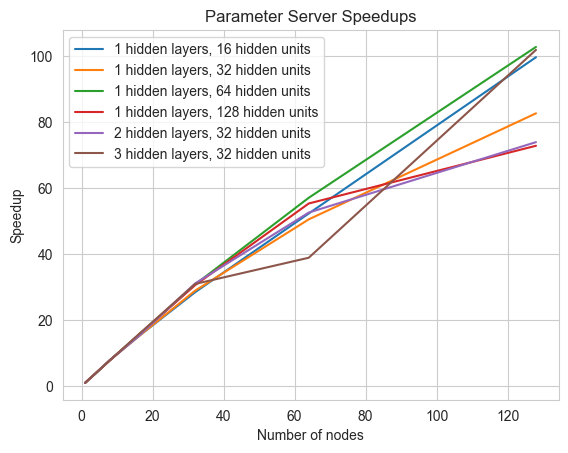

In [154]:
def plot_speedup(prog, n, d):
    bs = 256 if prog == 'mpara' else 32
    x = []
    y = []
    for m in [1, 2, 4, 8, 16, 32, 64, 128]:
        path = f'log/{prog}-{n}-{d}-0.1-{bs}-{m}.txt'
        t, _, _ = read_log(path)
        x.append(m)
        y.append(t)
    y = [y[0]/t for t in y]
    
    plt.plot(x, y, label=f"{n} hidden layers, {d} hidden units")

prog = "psrv"
plot_speedup(prog, 1, 16)
plot_speedup(prog, 1, 32)
plot_speedup(prog, 1, 64)
plot_speedup(prog, 1, 128)
plot_speedup(prog, 2, 32)
plot_speedup(prog, 3, 32)
plt.xlabel("Number of nodes")
plt.ylabel("Speedup")
plt.title(f"{PROGS[prog]} Speedups")
plt.legend(loc='upper left')
plt.savefig(f"fig/plot_speedup({prog}).png", dpi=300)

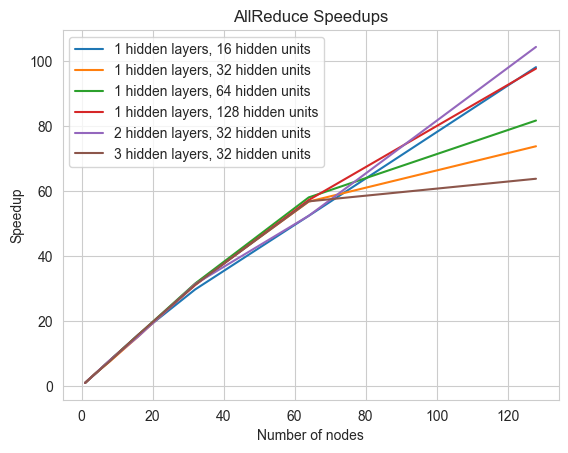

In [155]:
prog = "allreduce"
plot_speedup(prog, 1, 16)
plot_speedup(prog, 1, 32)
plot_speedup(prog, 1, 64)
plot_speedup(prog, 1, 128)
plot_speedup(prog, 2, 32)
plot_speedup(prog, 3, 32)
plt.xlabel("Number of nodes")
plt.ylabel("Speedup")
plt.title(f"{PROGS[prog]} Speedups")
plt.legend(loc='upper left')
plt.savefig(f"fig/plot_speedup({prog}).png", dpi=300)

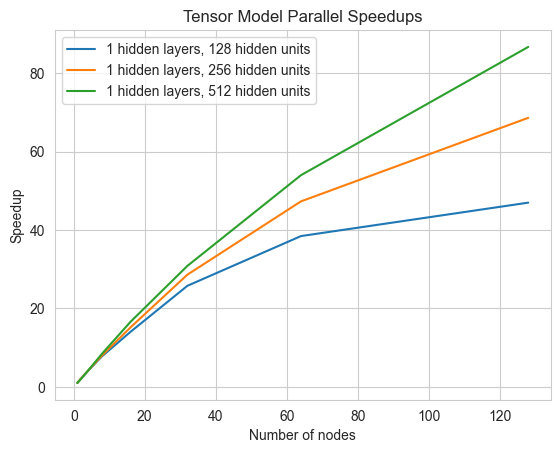

In [156]:
prog = "mpara"
plot_speedup(prog, 1, 128)
plot_speedup(prog, 1, 256)
plot_speedup(prog, 1, 512)
plt.xlabel("Number of nodes")
plt.ylabel("Speedup")
plt.title(f"{PROGS[prog]} Speedups")
plt.legend(loc='upper left')
plt.savefig(f"fig/plot_speedup({prog}).png", dpi=300)

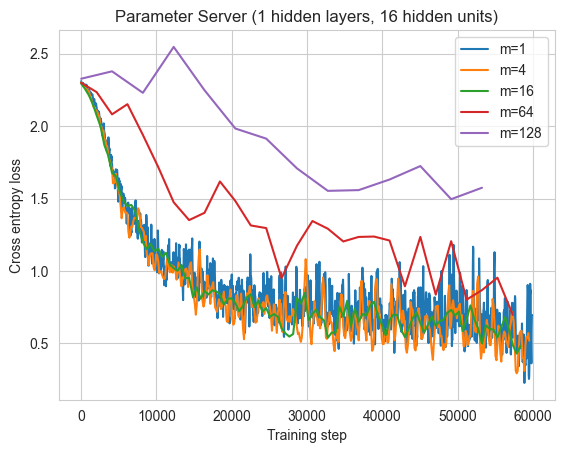

In [157]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

def smooth(x, y, n=3):
    if len(x) < 30:
        return x, y
    return x[:-n+1], moving_average(y, n)

def plot_loss(prog, n, d):
    bs = 256 if prog == 'mpara' else 32
    x = []
    y = []
    for m in [1, 4, 16, 64, 128]:
        path = f'log/{prog}-{n}-{d}-0.1-{bs}-{m}.txt'
        t, x, y = read_log(path)
        x, y = smooth(x, y)
        plt.plot(x, y, label=f"m={m}")

prog = "psrv"
n = 1
d = 16
plot_loss(prog, n, d)
plt.title(f"{PROGS[prog]} ({n} hidden layers, {d} hidden units)")
plt.xlabel("Training step")
plt.ylabel("Cross entropy loss")
plt.legend(loc='upper right')
plt.savefig(f"fig/plot_loss({prog}, {n}, {d}).png", dpi=300)

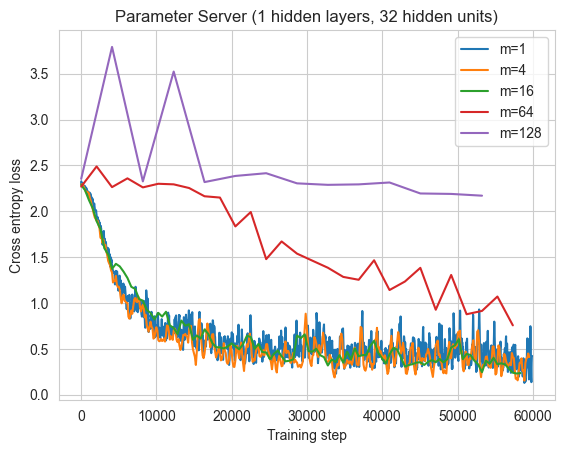

In [158]:
prog = "psrv"
n = 1
d = 32
plot_loss(prog, n, d)
plt.title(f"{PROGS[prog]} ({n} hidden layers, {d} hidden units)")
plt.xlabel("Training step")
plt.ylabel("Cross entropy loss")
plt.legend(loc='upper right')
plt.savefig(f"fig/plot_loss({prog}, {n}, {d}).png", dpi=300)

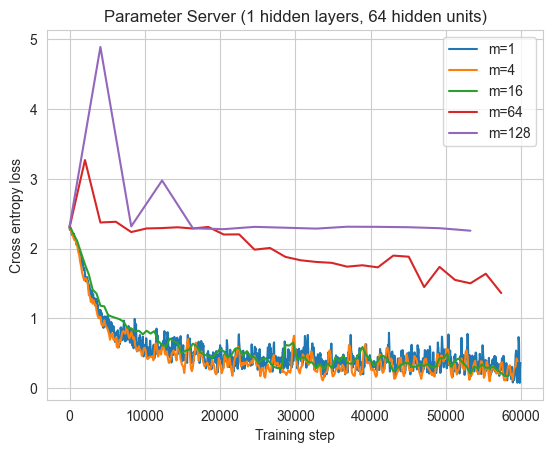

In [159]:
prog = "psrv"
n = 1
d = 64
plot_loss(prog, n, d)
plt.title(f"{PROGS[prog]} ({n} hidden layers, {d} hidden units)")
plt.xlabel("Training step")
plt.ylabel("Cross entropy loss")
plt.legend(loc='upper right')
plt.savefig(f"fig/plot_loss({prog}, {n}, {d}).png", dpi=300)

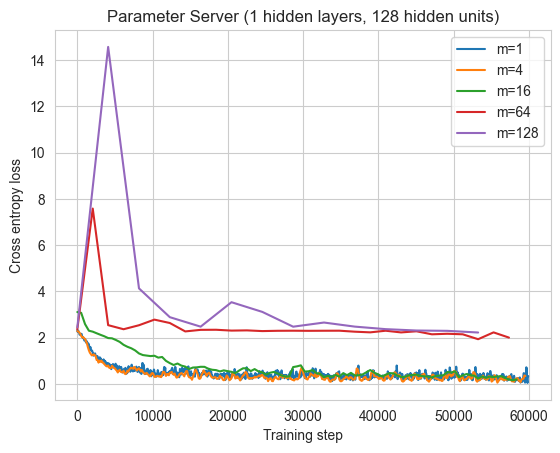

In [160]:
prog = "psrv"
n = 1
d = 128
plot_loss(prog, n, d)
plt.title(f"{PROGS[prog]} ({n} hidden layers, {d} hidden units)")
plt.xlabel("Training step")
plt.ylabel("Cross entropy loss")
plt.legend(loc='upper right')
plt.savefig(f"fig/plot_loss({prog}, {n}, {d}).png", dpi=300)

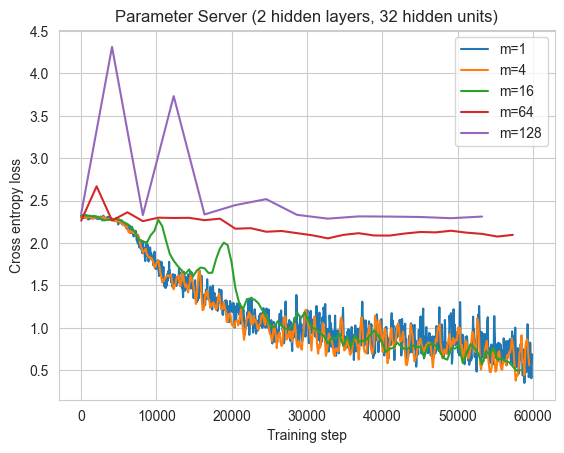

In [161]:
prog = "psrv"
n = 2
d = 32
plot_loss(prog, n, d)
plt.title(f"{PROGS[prog]} ({n} hidden layers, {d} hidden units)")
plt.xlabel("Training step")
plt.ylabel("Cross entropy loss")
plt.legend(loc='upper right')
plt.savefig(f"fig/plot_loss({prog}, {n}, {d}).png", dpi=300)

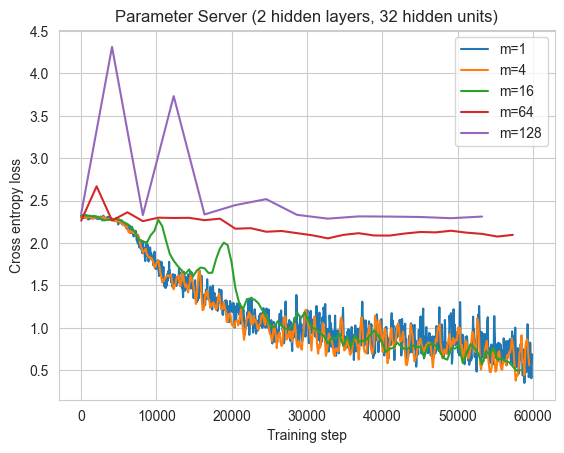

In [162]:
prog = "psrv"
n = 2
d = 32
plot_loss(prog, n, d)
plt.title(f"{PROGS[prog]} ({n} hidden layers, {d} hidden units)")
plt.xlabel("Training step")
plt.ylabel("Cross entropy loss")
plt.legend(loc='upper right')
plt.savefig(f"fig/plot_loss({prog}, {n}, {d}).png", dpi=300)

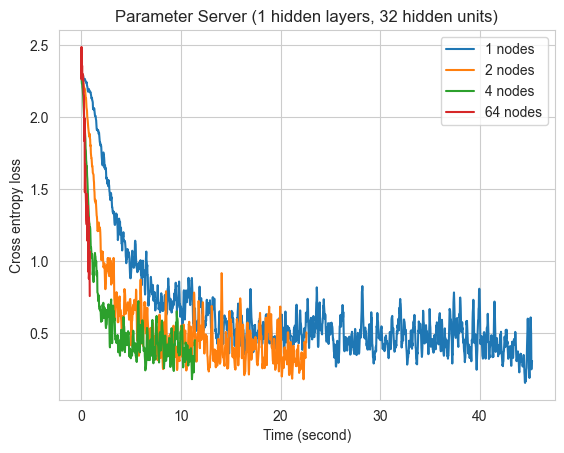

In [163]:
def plot_loss_t(prog, n, d):
    bs = 256 if prog == 'mpara' else 32
    x = []
    y = []
    for m in [1, 2, 4, 64]:
        path = f'log/{prog}-{n}-{d}-0.1-{bs}-{m}.txt'
        t, x, y = read_log(path)
        x, y = smooth(x, y, 5)
        x = [i/60000*t for i in x]
        plt.plot(x, y, label=f"{m} nodes")

prog = "psrv"
n = 1
d = 32
plot_loss_t(prog, n, d)
plt.title(f"{PROGS[prog]} ({n} hidden layers, {d} hidden units)")
plt.xlabel("Time (second)")
plt.ylabel("Cross entropy loss")
plt.legend(loc='upper right')
plt.savefig(f"fig/plot_loss_t({prog}, {n}, {d}).png", dpi=300)

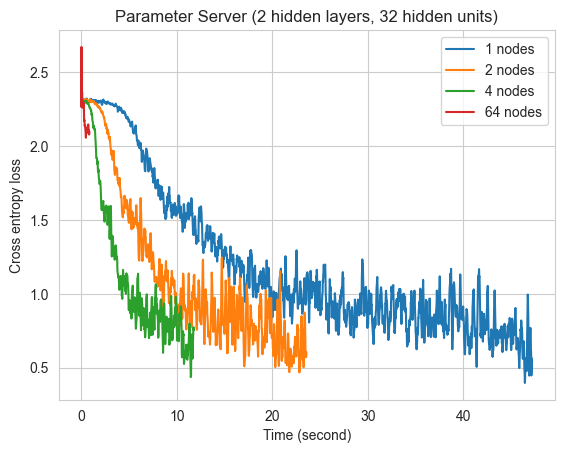

In [164]:
prog = "psrv"
n = 2
d = 32
plot_loss_t(prog, n, d)
plt.title(f"{PROGS[prog]} ({n} hidden layers, {d} hidden units)")
plt.xlabel("Time (second)")
plt.ylabel("Cross entropy loss")
plt.legend(loc='upper right')
plt.savefig(f"fig/plot_loss_t({prog}, {n}, {d}).png", dpi=300)

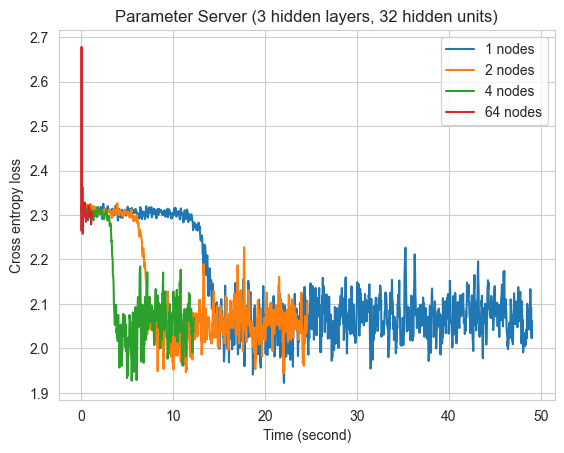

In [165]:
prog = "psrv"
n = 3
d = 32
plot_loss_t(prog, n, d)
plt.title(f"{PROGS[prog]} ({n} hidden layers, {d} hidden units)")
plt.xlabel("Time (second)")
plt.ylabel("Cross entropy loss")
plt.legend(loc='upper right')
plt.savefig(f"fig/plot_loss_t({prog}, {n}, {d}).png", dpi=300)

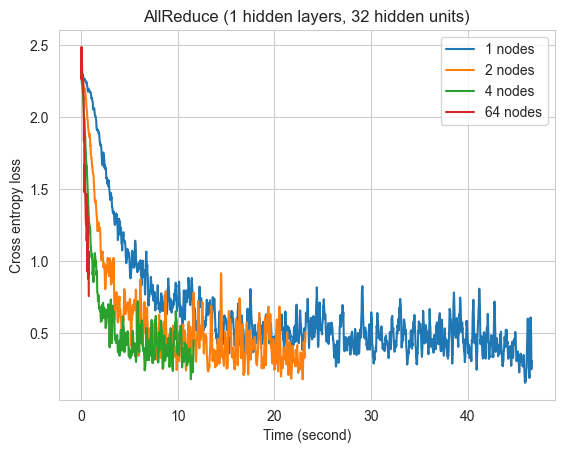

In [166]:
prog = "allreduce"
n = 1
d = 32
plot_loss_t(prog, n, d)
plt.title(f"{PROGS[prog]} ({n} hidden layers, {d} hidden units)")
plt.xlabel("Time (second)")
plt.ylabel("Cross entropy loss")
plt.legend(loc='upper right')
plt.savefig(f"fig/plot_loss_t({prog}, {n}, {d}).png", dpi=300)

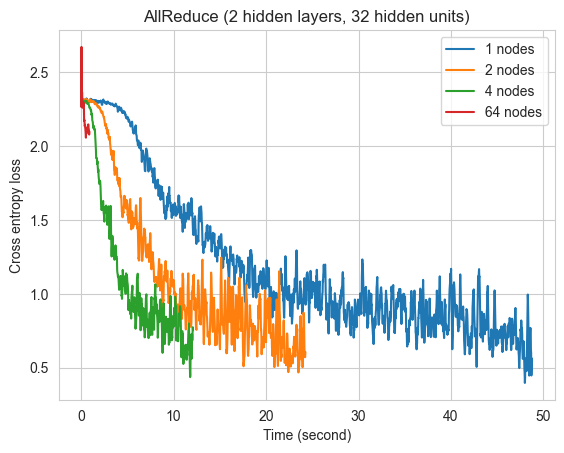

In [167]:
prog = "allreduce"
n = 2
d = 32
plot_loss_t(prog, n, d)
plt.title(f"{PROGS[prog]} ({n} hidden layers, {d} hidden units)")
plt.xlabel("Time (second)")
plt.ylabel("Cross entropy loss")
plt.legend(loc='upper right')
plt.savefig(f"fig/plot_loss_t({prog}, {n}, {d}).png", dpi=300)

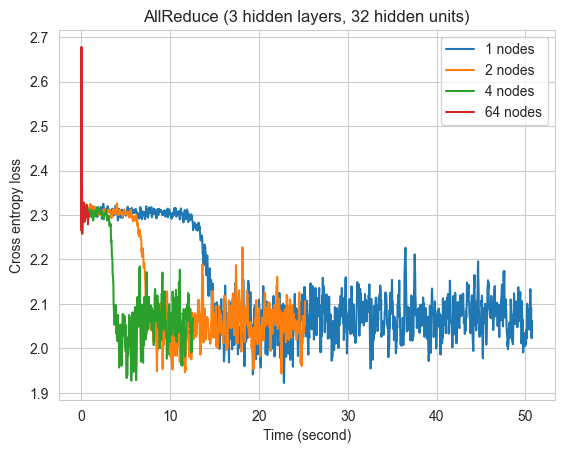

In [168]:
prog = "allreduce"
n = 3
d = 32
plot_loss_t(prog, n, d)
plt.title(f"{PROGS[prog]} ({n} hidden layers, {d} hidden units)")
plt.xlabel("Time (second)")
plt.ylabel("Cross entropy loss")
plt.legend(loc='upper right')
plt.savefig(f"fig/plot_loss_t({prog}, {n}, {d}).png", dpi=300)

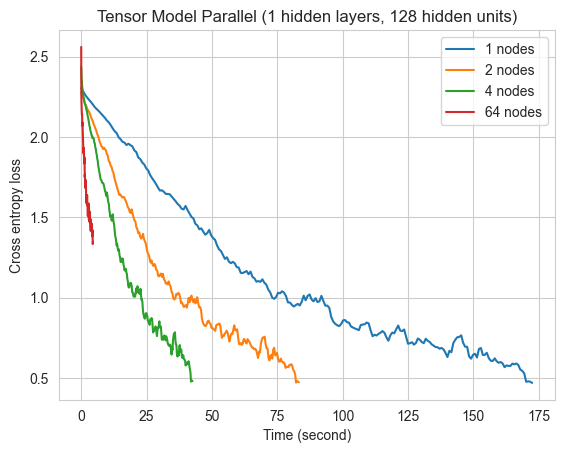

In [169]:
prog = "mpara"
n = 1
d = 128
plot_loss_t(prog, n, d)
plt.title(f"{PROGS[prog]} ({n} hidden layers, {d} hidden units)")
plt.xlabel("Time (second)")
plt.ylabel("Cross entropy loss")
plt.legend(loc='upper right')
plt.savefig(f"fig/plot_loss_t({prog}, {n}, {d}).png", dpi=300)

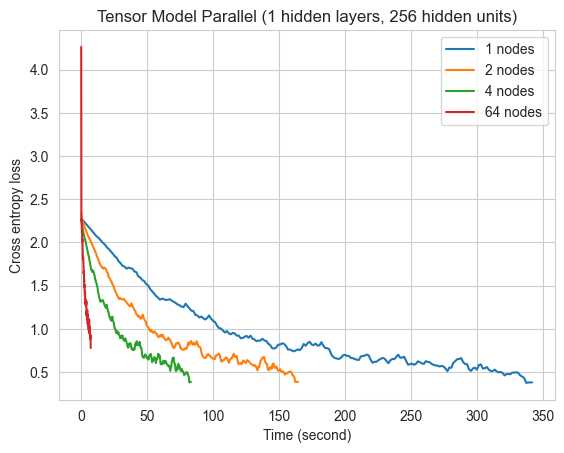

In [170]:
prog = "mpara"
n = 1
d = 256
plot_loss_t(prog, n, d)
plt.title(f"{PROGS[prog]} ({n} hidden layers, {d} hidden units)")
plt.xlabel("Time (second)")
plt.ylabel("Cross entropy loss")
plt.legend(loc='upper right')
plt.savefig(f"fig/plot_loss_t({prog}, {n}, {d}).png", dpi=300)

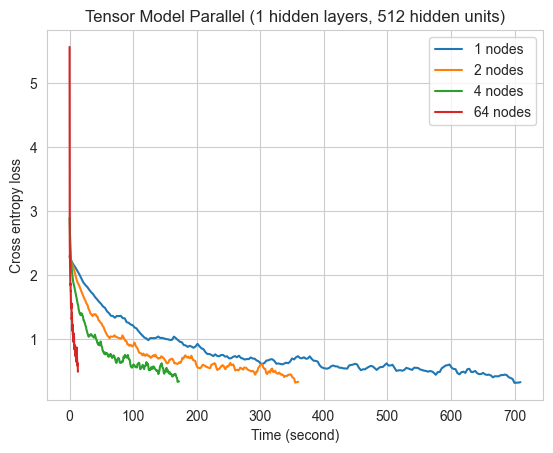

In [171]:
prog = "mpara"
n = 1
d = 512
plot_loss_t(prog, n, d)
plt.title(f"{PROGS[prog]} ({n} hidden layers, {d} hidden units)")
plt.xlabel("Time (second)")
plt.ylabel("Cross entropy loss")
plt.legend(loc='upper right')
plt.savefig(f"fig/plot_loss_t({prog}, {n}, {d}).png", dpi=300)